In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

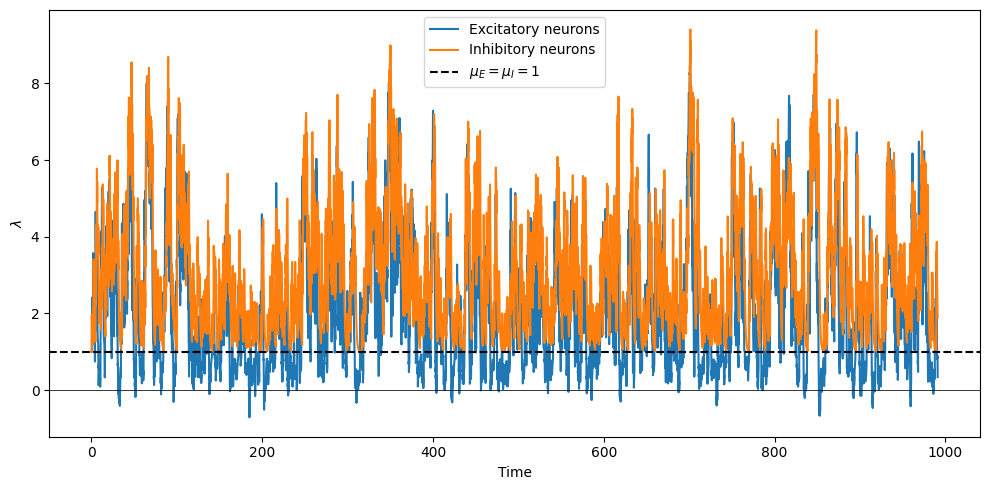

In [18]:
nmax = 10**4
N = 1000 # number of neurons
N_E = 800 # number of excitatory neurons
N_I = 200 # number of inhibitory neurons
g_E= 1.5/N # connection strength of excitatory neurons
g_I= 7.5/N # connection strength of inhibitory neurons
k = 1
mu_E = 1
mu_I = 1
tau = 1

# These parameters are similar to the ones used in Growing Critical: Self-Organized Criticality in a Developing Neural System Felipe Yaroslav Kalle Kossio
"""n_EE = 1.5*(4/5)**2
n_IE = 7.5*4/(5**2)
n_EI = 1.5*4/(5**2)
n_II = 7.5*1/(5**2)"""

n_EE = N*g_E*(N_E/N)*(N_E/N)*k
n_IE = N*g_I*(N_I/N)*(N_I/N)*k
n_EI = N*g_E*(N_E/N)*(N_E/N)*k
n_II = 0

dt = 0.1

time, t_E, t_I, rates_E, rates_I = model(nmax, mu_E, mu_I, tau, n_EE, n_IE, n_EI, n_II, dt)

fig = plt.figure(figsize=(10, 5))
plt.plot(time, rates_E, label='Excitatory neurons')
plt.plot(time, rates_I, label='Inhibitory neurons')
plt.xlabel('Time')
plt.axhline(1, label = '$\mu_E=\mu_I=1$', color = 'black', linestyle = '--')
plt.axhline(0, color = 'black',lw = 0.55)
plt.ylabel('$\lambda$')
plt.legend()
fig.tight_layout()


(25.0, 30.0)

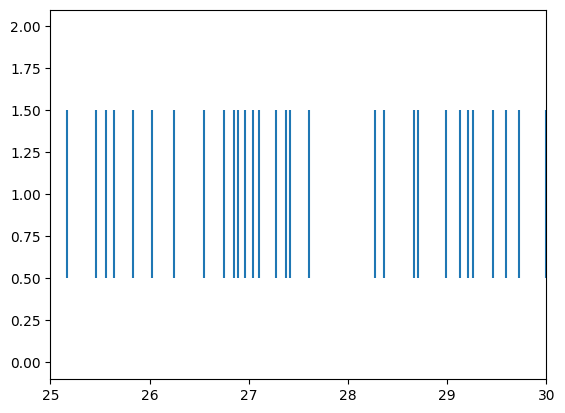

In [6]:
plt.eventplot(t_E)
plt.xlim(25, 30)

In [13]:
print(t_E[-10:])

[0, 1.0912131422435527, 1.7375020652152795, 1.81564016526673, 2.1572956616518972, 2.279090039226368, 2.351815329666481, 2.467257486003604, 3.083448948072693, 3.268275685704241, 3.289306129334666, 3.3182910798202787, 3.4514416003102113, 3.6647278524755635, 3.9163001522785192, 4.056963781507992, 4.291932616341375, 4.312371366353824, 4.548298582359489, 5.0067335538777575, 5.491192192016821, 5.648553148803605, 6.078854720138365, 6.1931521388499915, 6.664523202833598, 6.985268192921195, 7.160579133260157, 7.362122318925462, 7.4740988890421365, 7.44492106694377, 7.7733875571658935, 7.804426738353751, 8.723152294087463, 8.892338035031942, 8.988875534345684, 9.686832381647196, 10.002491580895667, 10.228103407906527, 10.558998178110834, 10.819980712725009, 12.273454456223504, 12.842170874271241, 13.026962036696942, 13.706269226579622, 13.877326628017418, 14.943993431263946, 15.03879603848094, 15.165943751060528, 15.469934860446369, 15.538870230174677, 15.504794784348945, 15.642146027611627, 15.

# Statistics

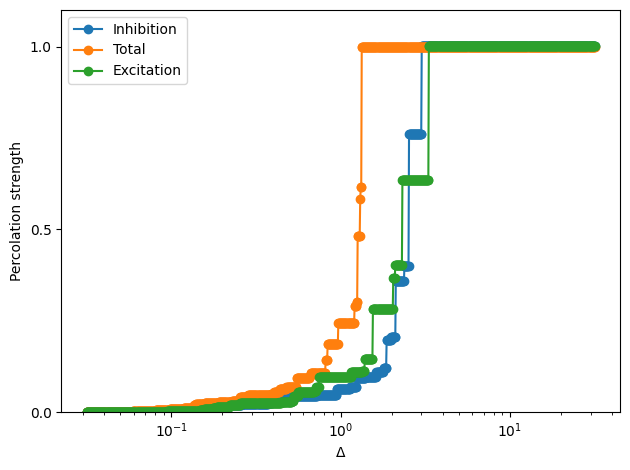

In [43]:
deltas = np.logspace(-1.5, 1.5, base= 10, num = 1000)
percolation_strength_exc = calculate_percolation_strength(np.diff(t_E), deltas)
percolation_strength_inh = calculate_percolation_strength(np.diff(t_I), deltas)
t = np.concatenate((t_E, t_I))
t = np.sort(t)
percolation_strength_tot = calculate_percolation_strength(np.diff(t), deltas)
plt.plot(deltas, percolation_strength_inh, marker = 'o', label = 'Inhibition')
plt.plot(deltas, percolation_strength_tot, marker = 'o', label = 'Total')
plt.plot(deltas, percolation_strength_exc, marker = 'o', label = 'Excitation')
plt.xscale('log')
plt.ylim(0, 1.1)
plt.yticks([0, 0.5, 1])
plt.xlabel('$\Delta$')
plt.ylabel('Percolation strength')
plt.legend()

plt.tight_layout()

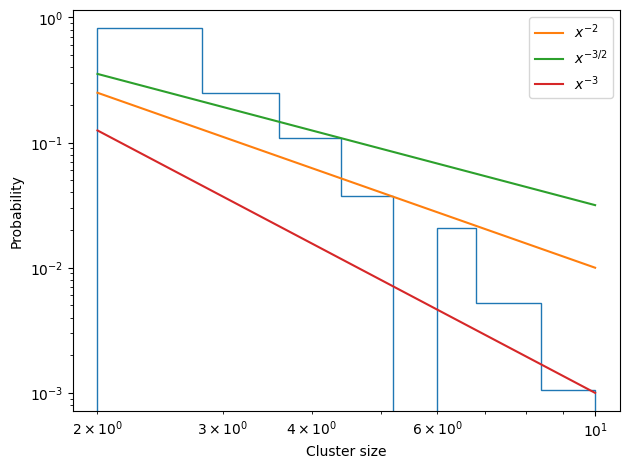

In [42]:
delta = 10**-1
clusters = identify_clusters(t_E, delta)
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

plt.hist(cluster_sizes, density = True, histtype= 'step')
plt.xscale('log')
plt.yscale('log')
x = np.linspace(2, 10, 100)
y = x**-2
y_2 = x**(-3/2)
y_3 = x**(-3)
plt.plot(x, y, label = '$x^{-2}$')
plt.plot(x, y_2, label = '$x^{-3/2}$')
plt.plot(x, y_3, label = '$x^{-3}$')
plt.xlabel('Cluster size')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()

C:\Users\anton\AppData\Local\Temp\ipykernel_988\2914771443.py:6: RuntimeWarning: invalid value encountered in power
  y_2 = x**(-3/2)*10**-2


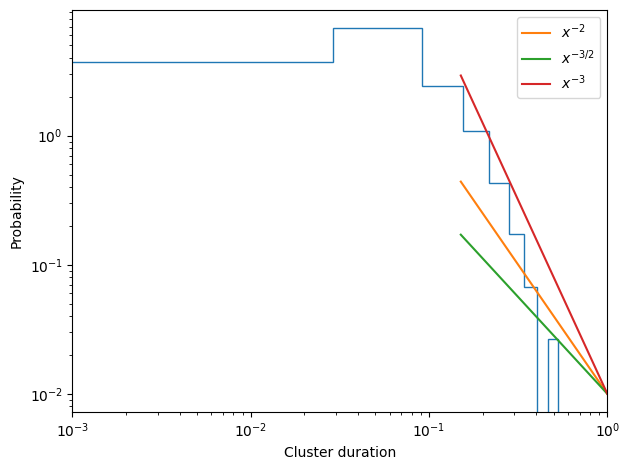

In [41]:
plt.hist(cluster_times, density = True, histtype= 'step')
plt.xscale('log')
plt.yscale('log')
x = np.linspace(-10**-3, 1, 100)
y = x**-2*10**-2
y_2 = x**(-3/2)*10**-2
y_3 = x**(-3)*10**-2
plt.plot(x[15:], y[15:], label = '$x^{-2}$')
plt.plot(x[15:], y_2[15:], label = '$x^{-3/2}$')
plt.plot(x[15:], y_3[15:], label = '$x^{-3}$')

plt.xlim(10**-3, 10**0)
plt.xlabel('Cluster duration')
plt.ylabel('Probability')
plt.legend()
plt.tight_layout()